In [1]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd
import estimation_assessment.scores as es_as

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const
from vicon_imu_data_process.dataset import *

from estimation_models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

from estimation_study import *
from estimation_assessment.visualization import *
#import pdb
import re

tensorflow version: 2.5.0
tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [4]:
14/12

1.1666666666666667

In [7]:
all_subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'all_subjects_landing_data.hdf5'))
all_subjects_trials_dataset.keys()

dict_keys(['P_08_zhangboyuan', 'P_09_libang', 'P_10_dongxuan', 'P_11_liuchunyu', 'P_12_fuzijun', 'P_13_xulibang', 'P_14_hunan', 'P_15_liuzhaoyu', 'P_16_zhangjinduo', 'P_17_congyuanqi', 'P_18_hezhonghai', 'P_19_xiongyihui', 'P_20_xuanweicheng', 'P_21_wujianing', 'P_22_zhangning', 'P_23_wangjinhong', 'P_24_liziqing'])

In [3]:
subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_11subjects_kam_norm_landing_data.hdf5'))

In [4]:
subjects_trials_dataset.keys()
subjects_trials_dataset['P_14_hunan']['03'].head()

,TIME,CHEST_Accel_X,CHEST_Accel_Y,CHEST_Accel_Z,CHEST_Gyro_X,CHEST_Gyro_Y,CHEST_Gyro_Z,WAIST_Accel_X,WAIST_Accel_Y,WAIST_Accel_Z,...,L_SHANK_Gyro_X,L_SHANK_Gyro_Y,L_SHANK_Gyro_Z,L_FOOT_Accel_X,L_FOOT_Accel_Y,L_FOOT_Accel_Z,L_FOOT_Gyro_X,L_FOOT_Gyro_Y,L_FOOT_Gyro_Z,R_KNEE_MOMENT_X
0,-1.710534,-0.703738,-0.725762,0.695129,-1.067757,-1.897501,-2.284423,0.336099,-0.770106,1.131457,...,-0.103855,0.124147,2.425328,-0.805422,-0.317929,-1.006571,-0.336658,-0.020232,0.828836,-0.663355
1,-1.667229,-0.352806,-0.842766,0.815273,-1.257325,-1.827826,-2.195914,0.249003,-0.860908,1.138601,...,-0.096045,0.243160,2.375945,-0.460651,0.159330,-0.936069,0.000179,0.014488,0.618046,-0.671081
2,-1.623924,0.139076,-0.950268,0.927985,-1.437037,-1.650852,-2.081461,0.092550,-0.902445,1.144855,...,-0.045399,0.422818,2.311010,-0.125119,0.577331,-0.836106,0.310187,-0.053502,0.515219,-0.674850
3,-1.580620,0.669338,-1.031011,1.035418,-1.587701,-1.365844,-2.005884,-0.065935,-0.897844,1.151466,...,0.062489,0.602937,2.235214,0.105892,0.968975,-0.713841,0.555078,-0.231768,0.519249,-0.676107
4,-1.537315,1.123982,-1.072187,1.140191,-1.700432,-0.992048,-2.005934,-0.167604,-0.860152,1.158857,...,0.219230,0.710723,2.148911,0.185362,1.337375,-0.593781,0.705936,-0.513275,0.608595,-0.676426


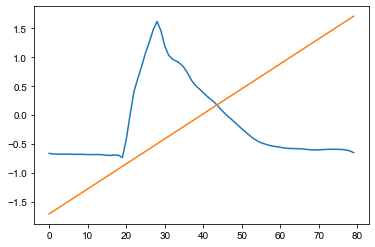

In [4]:
plt.plot(subjects_trials_dataset['P_14_hunan']['03']['R_KNEE_MOMENT_X'])
plt.plot(subjects_trials_dataset['P_14_hunan']['03']['TIME'])

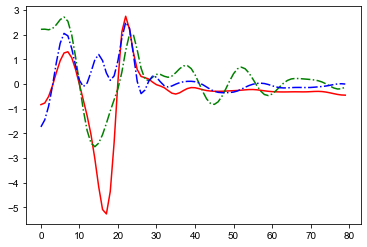

In [5]:
plt.plot(subjects_trials_dataset['P_19_xiongyihui']['02']['R_FOOT_Accel_X'],'r-')
plt.plot(subjects_trials_dataset['P_20_xuanweicheng']['03']['R_FOOT_Accel_X'],'g-.')
plt.plot(subjects_trials_dataset['P_16_zhangjinduo']['04']['R_FOOT_Accel_X'],'b-.')

In [8]:
subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_8subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_9subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_10subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_11subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)

subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_12subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_13subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_14subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_15subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data','5trials_16subjects_kam_norm_landing_data.hdf5'))
pro_rd.get_subjects_trials_number(subjects_trials_dataset)


{'P_15_liuzhaoyu': 5, 'P_16_zhangjinduo': 5, 'P_17_congyuanqi': 5, 'P_18_hezhonghai': 5, 'P_19_xiongyihui': 5, 'P_20_xuanweicheng': 5, 'P_21_wujianing': 5, 'P_22_zhangning': 5}
The all trial numnber: 40
{'P_15_liuzhaoyu': 5, 'P_16_zhangjinduo': 5, 'P_17_congyuanqi': 5, 'P_18_hezhonghai': 5, 'P_19_xiongyihui': 5, 'P_20_xuanweicheng': 5, 'P_21_wujianing': 5, 'P_22_zhangning': 5, 'P_23_wangjinhong': 5}
The all trial numnber: 45
{'P_08_zhangboyuan': 5, 'P_15_liuzhaoyu': 5, 'P_16_zhangjinduo': 5, 'P_17_congyuanqi': 5, 'P_18_hezhonghai': 5, 'P_19_xiongyihui': 5, 'P_20_xuanweicheng': 5, 'P_21_wujianing': 5, 'P_22_zhangning': 5, 'P_23_wangjinhong': 5}
The all trial numnber: 50
{'P_08_zhangboyuan': 5, 'P_14_hunan': 5, 'P_15_liuzhaoyu': 5, 'P_16_zhangjinduo': 5, 'P_17_congyuanqi': 5, 'P_18_hezhonghai': 5, 'P_19_xiongyihui': 5, 'P_20_xuanweicheng': 5, 'P_21_wujianing': 5, 'P_22_zhangning': 5, 'P_23_wangjinhong': 5}
The all trial numnber: 55
{'P_08_zhangboyuan': 5, 'P_14_hunan': 5, 'P_15_liuzhaoyu

OSError: Unable to open file (unable to open file: name = '/home/sun/drop_landing_workspace/data/selected_data/5trials_16subjects_kam_norm_landing_data.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

    CHEST_Accel_X  CHEST_Accel_Y  CHEST_Accel_Z  CHEST_Gyro_X  CHEST_Gyro_Y  \
0       -1.387034       2.796255      -0.943298     -1.012042     -0.593076   
1       -0.788792       1.650273      -0.432814     -1.190595     -0.571663   
2        0.049729       0.597362       0.046089     -1.359866     -0.517272   
3        0.953678      -0.193470       0.502562     -1.501775     -0.429679   
4        1.728718      -0.596759       0.947735     -1.607957     -0.314797   
..            ...            ...            ...           ...           ...   
75       0.249407       4.379273      -3.144011     -1.543844     -0.303939   
76       0.190592       4.455357      -3.067809     -1.548259     -0.329551   
77       0.138214       4.555784      -3.089730     -1.546108     -0.351160   
78       0.101052       4.680064      -3.211987     -1.534672     -0.368183   
79       0.076490       4.832594      -3.419622     -1.508967     -0.383165   

    CHEST_Gyro_Z  CHEST_Mag_X  CHEST_Mag_Y  CHEST_M

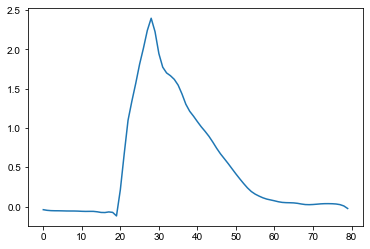

In [22]:

print(all_subjects_trials_dataset['P_14_hunan']['03'])
plt.plot(all_subjects_trials_dataset['P_14_hunan']['03']['R_KNEE_MOMENT_X'])

In [35]:
v2_augment_subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'v2_2_5d_augment_kam_norm_landing_data.hdf5'))
#print(subjects_trials_dataset['P_08_zhangboyuan'].keys())
v2_augment_subjects_trials_dataset['P_08_zhangboyuan']['01_17']

,CHEST_Accel_X,CHEST_Accel_Y,CHEST_Accel_Z,CHEST_Gyro_X,CHEST_Gyro_Y,CHEST_Gyro_Z,WAIST_Accel_X,WAIST_Accel_Y,WAIST_Accel_Z,WAIST_Gyro_X,...,L_SHANK_Gyro_Y,L_SHANK_Gyro_Z,L_FOOT_Accel_X,L_FOOT_Accel_Y,L_FOOT_Accel_Z,L_FOOT_Gyro_X,L_FOOT_Gyro_Y,L_FOOT_Gyro_Z,TIME,R_KNEE_MOMENT_X
0,-0.307743,-0.848483,0.886402,0.201739,0.832931,0.105811,-0.409672,-0.812233,1.219347,-0.198479,...,2.015743,1.318920,0.007890,0.214291,-0.785808,0.429048,0.295970,2.494976,-1.710534,-0.681864
1,-0.280371,-0.802816,0.910427,0.093627,0.909836,0.041653,-0.465538,-0.866906,1.214529,-0.323971,...,1.773624,1.277570,-0.293376,0.304545,-0.716163,0.365726,0.239581,2.377982,-1.667229,-0.680241
2,-0.244814,-0.774021,0.932067,-0.034777,1.001446,-0.023239,-0.396340,-0.895519,1.198755,-0.399684,...,1.428282,1.243045,-0.618836,0.289109,-0.761043,0.267304,0.078228,2.204453,-1.623924,-0.679721
3,-0.198346,-0.760491,0.951081,-0.182230,1.079027,-0.081435,-0.227489,-0.894633,1.179919,-0.439617,...,1.038673,1.210406,-0.950486,0.218353,-0.899204,0.184937,-0.161500,1.963400,-1.580620,-0.682034
4,-0.135312,-0.757351,0.966908,-0.341787,1.115470,-0.128699,-0.006415,-0.867088,1.165251,-0.464982,...,0.664248,1.170919,-1.246950,0.150590,-1.085972,0.147702,-0.440947,1.657702,-1.537315,-0.685047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.257972,-0.011182,1.133225,-0.240339,0.062359,0.207354,0.574025,-0.042988,0.564440,-0.109085,...,-0.121612,-0.045492,0.296214,-0.262877,0.444766,0.206899,-0.125350,-0.158966,1.537315,-0.343186
76,0.193218,-0.036154,1.121625,-0.263476,0.030059,0.221108,0.580499,-0.065291,0.558010,-0.068496,...,-0.077985,-0.053130,0.301120,-0.265009,0.442733,0.199733,-0.131683,-0.150144,1.580620,-0.353327
77,0.127517,-0.056372,1.109515,-0.268156,0.006586,0.222826,0.571514,-0.079616,0.539181,-0.021621,...,-0.036555,-0.063215,0.313075,-0.269360,0.440253,0.193788,-0.134216,-0.142295,1.623924,-0.360142
78,0.067892,-0.071170,1.097860,-0.254249,-0.007835,0.216033,0.549768,-0.084547,0.509169,0.025668,...,-0.013909,-0.073312,0.328938,-0.275995,0.437672,0.189357,-0.131502,-0.137383,1.667229,-0.366597


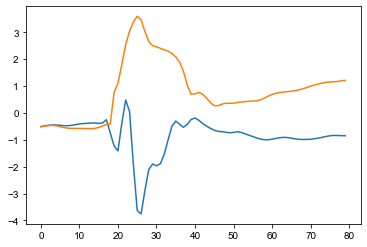

In [31]:
kym_subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'selected_data', "5trials_15subjects_kym_norm_landing_data.hdf5"))
#print(subjects_trials_dataset['P_08_zhangboyuan'].keys())
kym_subjects_trials_dataset['P_08_zhangboyuan']['01']

plt.plot(kym_subjects_trials_dataset['P_08_zhangboyuan']['05']['R_KNEE_MOMENT_Y'])
plt.plot(kym_subjects_trials_dataset['P_14_hunan']['09']['R_KNEE_MOMENT_Y'])

In [24]:
print(kym_subjects_trials_dataset['P_08_zhangboyuan'].keys())

dict_keys(['01', '02', '03', '04', '05'])


In [52]:
import itertools
import random
N=15
summ=0
for n1 in range(1,14):
    n1=2
    li=sorted(list(range(N)))
    co=list(itertools.combinations(li,n1))
    summ+=len(random.sample(co,15))
    for 
print(summ)

['P_10_dongxuan',
 'P_11_liuchunyu',
 'P_13_xulibang',
 'P_14_hunan',
 'P_15_liuzhaoyu',
 'P_16_zhangjinduo',
 'P_17_congyuanqi',
 'P_18_hezhonghai',
 'P_19_xiongyihui',
 'P_20_xuanweicheng',
 'P_21_wujianing',
 'P_22_zhangning',
 'P_23_wangjinhong',
 'P_24_liziqing']